# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1384 Камынин Александр Александрович и Кондратенко Константин Евгеньевич. Вариант №8.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.



## Основные теоретические положения

- Дискретное время - время, измеренное в единицах времени nT, где $ n \in \mathbb{Z} $, а $ T \in \mathbb{R} $ - шаг дискретизации (период дискретизации).

- Дискретное нормированное время - это время, измеренное в единицах n, где $ n \in \mathbb{Z} $

1) Дискретный единичный цифровой импульс:
    $$ \delta_{d}(k) = \begin{cases} 1, k = 0 \\ 0, k \ne 0 \end{cases} $$

    Является дискретным аналогом дельта-функции (функции Дирака):
    $$ \delta_{d}(k) = \begin{cases} \infty, t = 0 \\ 0, t \ne 0 \end{cases} $$

2) Дискретный единичный скачок:
    $$ \sigma_{d}(k) = \begin{cases} 1, k \ge 0 \\ 0, k < 0 \end{cases} $$

    Является дискретным аналогом функции единичного скачка (функция Хевисайда):
    $$ \sigma_{d}(k) = \begin{cases} 1, t > 0 \\ \text{0.5 или неопределена, t = 0} \\ 0, t < 0 \end{cases} $$

3) Дискретная экспоненциальная функция:
    $$ s_{1}(k) = \begin{cases} a^{k}, k \ge 0 \\ 0, k < 0 \end{cases} $$

4) Дискретный комплесный гармонический сигнал:
    $$ s_{2}(k) = C \exp(j \hat{w_0} k) $$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [1]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plot functions
class sub_plt():
    def __init__(self, title:str, x, y, x_label, y_label, pos) -> None:
        self.title=title
        self.x=x
        self.y=y
        self.x_label=x_label
        self.y_label=y_label 
        self.pos=pos

def graphic(sub_plt_list, size):
    plt.figure(figsize=size)

    for sub_plot in sub_plt_list:
        plt.subplot(*sub_plot.pos)
        plt.stem(sub_plot.x, sub_plot.y)
        plt.title(sub_plot.title)
        plt.xlabel(sub_plot.x_label)
        plt.ylabel(sub_plot.y_label)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Таблица переменных для варианта: 

| N(бр) | 8      |
|-------|--------|
| N     | 33     |
| T     | 0.0015 |
| a     | 0.84   |
| C     | 4      |
| $\hat{\omega}$ | $\frac{\pi}{9}$   |
| m     | 8      |6

In [3]:
N_br = 8 
N = 30 + N_br % 5
T = 0.05*(1 + N_br % 3) 
a = (-1) ** N_br * (0.8 + 0.005*(N_br % 20))
C = 1 + N_br % 5
omega = np.pi / (6 + N_br % 5)
m = 5 + N_br % 5

### Задание 1.
Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить:
- взаимосвязь между дискретным и дискретным нормированным временем;
- различие между единичным цифровым импульсом и дельта-функцией.

a) Взаимосвязь между дискретным и дискретным нормированным временем.

Дискретное время k и дискретное нормированное время nT связаны соотношением: $ k = nT $, где $ n \in [0, N-1] $, а T - шаг дискретизации.

б) Различие между единичным цифровым импульсом и дельта-функцией.

Единичный цифровой импульс - это дискретная функция, равная 1 при k=0 и 0 при остальных значениях. Дельта-функция (она же функция Дирака), в свою очередь, непрерывная функция, принимающая значение $\infty$ при t=0 и 0 в остальных значениях.

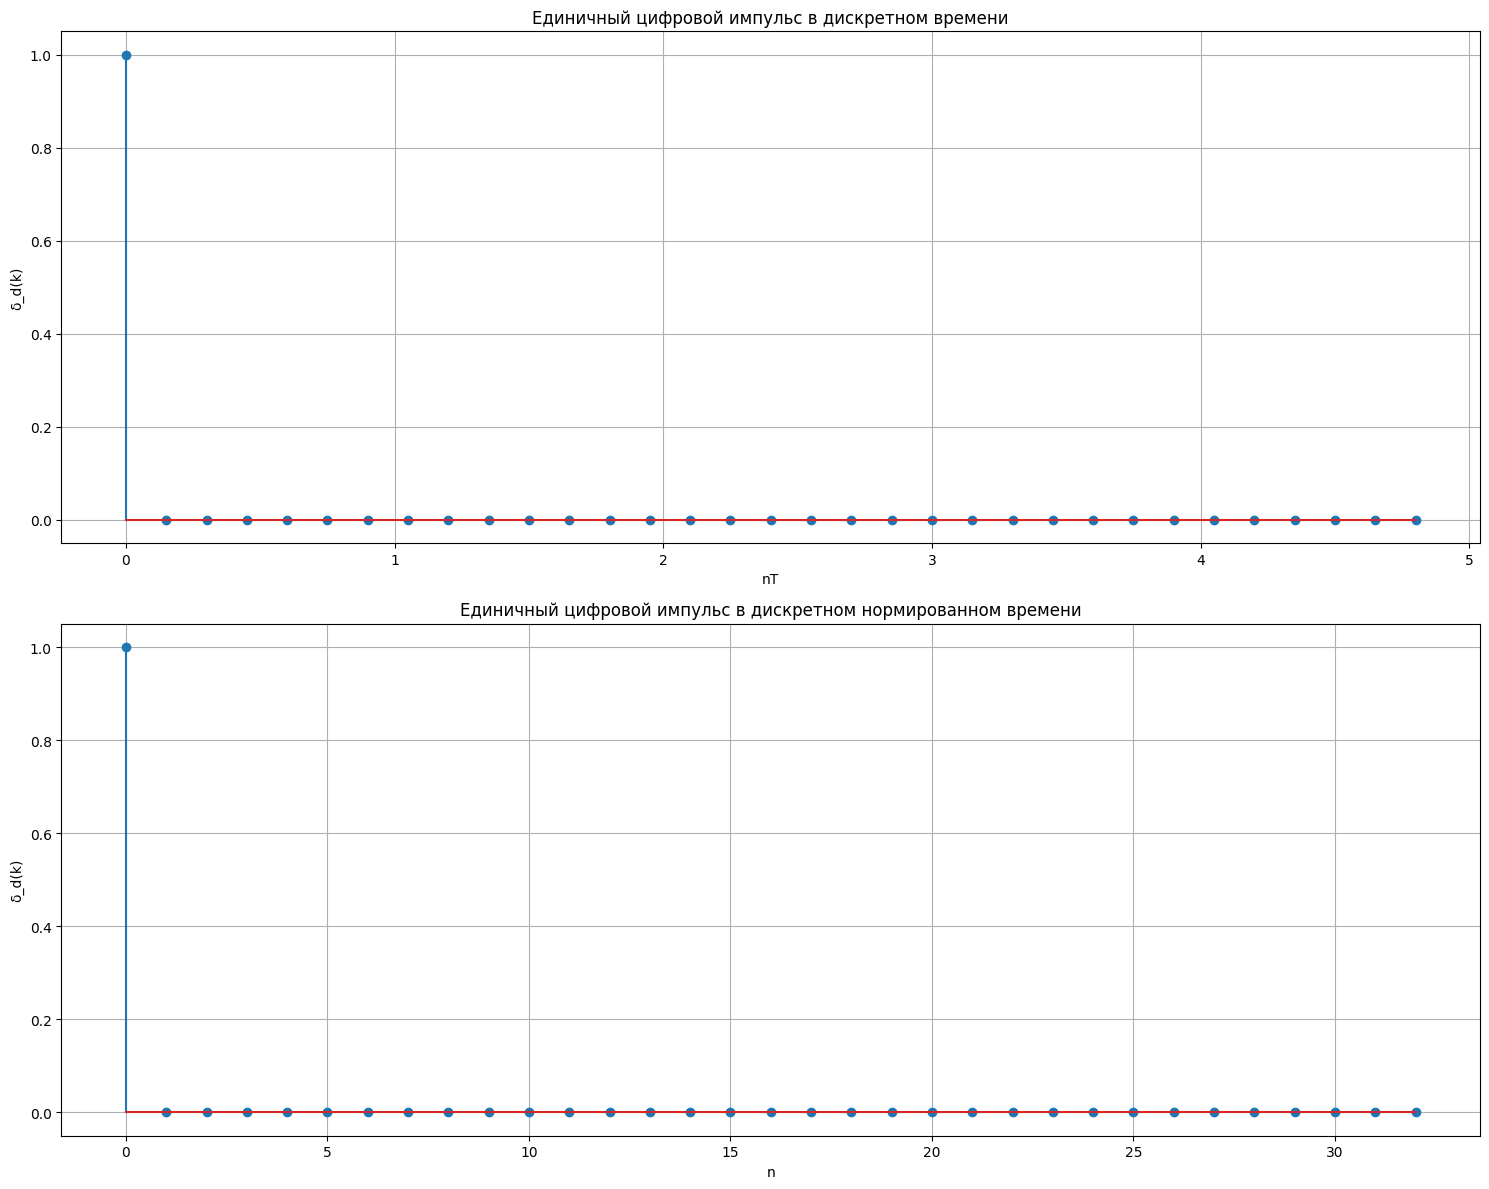

In [4]:
nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_delta_d(interval, m = 0):
    delta_d = np.zeros(len(interval))
    delta_d[m] = 1
    return delta_d

nT_delta_d = get_delta_d(nT_interval, m=0)
n_delta_d = get_delta_d(n_interval, m=0)

sub_plt1 = sub_plt(
    title='Единичный цифровой импульс в дискретном времени',
    x=nT_interval,
    y=nT_delta_d,
    x_label='nT',
    y_label='δ_d(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Единичный цифровой импульс в дискретном нормированном времени',
    x=n_interval,
    y=n_delta_d,
    x_label='n',
    y_label='δ_d(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (15, 12))


### Задание 2.
Смоделировать дискретный единичный скачок $\sigma_{d}(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить:
- соответствие между дискретным и аналоговым единичными скачками;
- чему равна частота дискретизации дискретного единичного скачка.

a) Соответствие между дискретным и аналоговым единичным скачками.

Дискретный единичный скачок является дискретным аналогом функции единичного скачка (функция Хевисайда).

б) Чему равна частота дискретизации дискретного единичного скачка.

Частота дискретизации для дискретного единичного скачка определяется как величина, обраная величине шага дискретизации: $ f = \frac{1}{T} = \frac{1}{0.0015} = 666.67 $ Гц

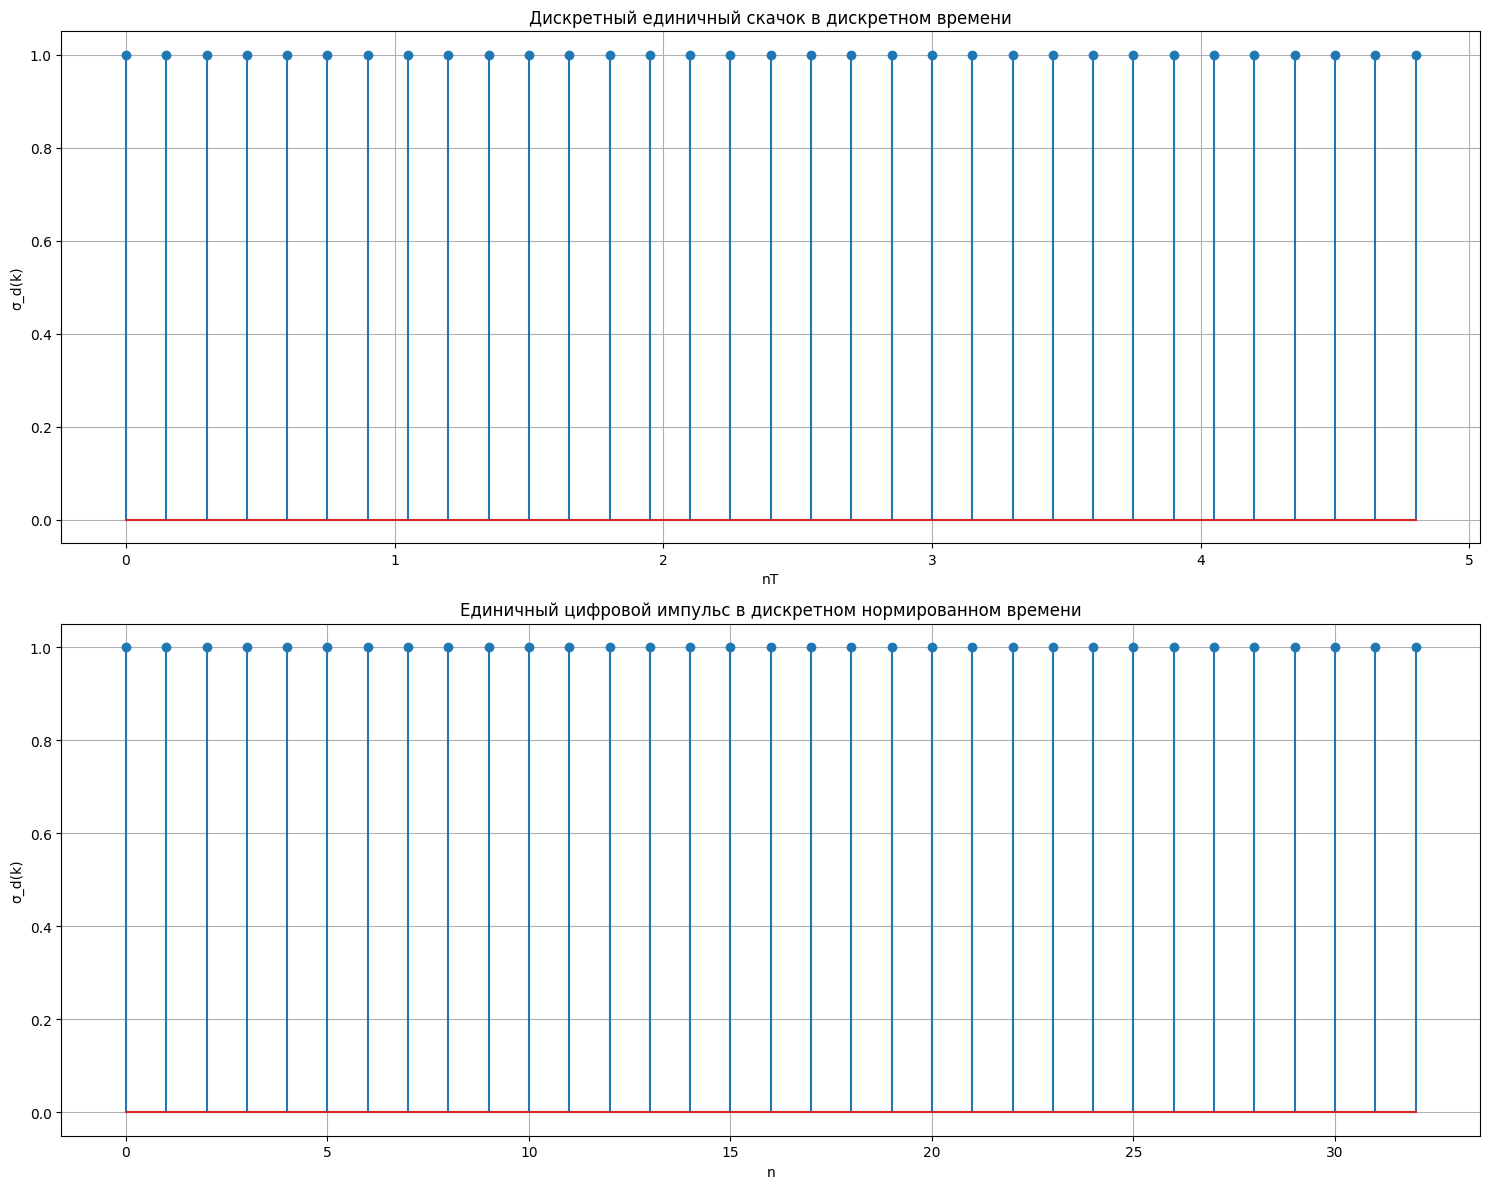

In [5]:

nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_sigma_d(interval, m=0):
    sigma_d = np.zeros(len(interval))
    sigma_d[m:] = 1
    return sigma_d

nT_sigma_d = get_sigma_d(nT_interval, m=0)
n_sigma_d = get_sigma_d(n_interval, m=0)

sub_plt1 = sub_plt(
    title='Дискретный единичный скачок в дискретном времени',
    x=nT_interval,
    y=nT_sigma_d,
    x_label='nT',
    y_label='σ_d(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Единичный цифровой импульс в дискретном нормированном времени',
    x=n_interval,
    y=n_sigma_d,
    x_label='n',
    y_label='σ_d(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (15, 12))


### Задание 3.
Смоделировать дискретную экспоненциальную функцию $s_{1}(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

Соответствие между дискретной и аналоговой экспонентами: дискретная экпонента представляет собой значения аналоговой экспоненты, взятый в дискретный момент времени.

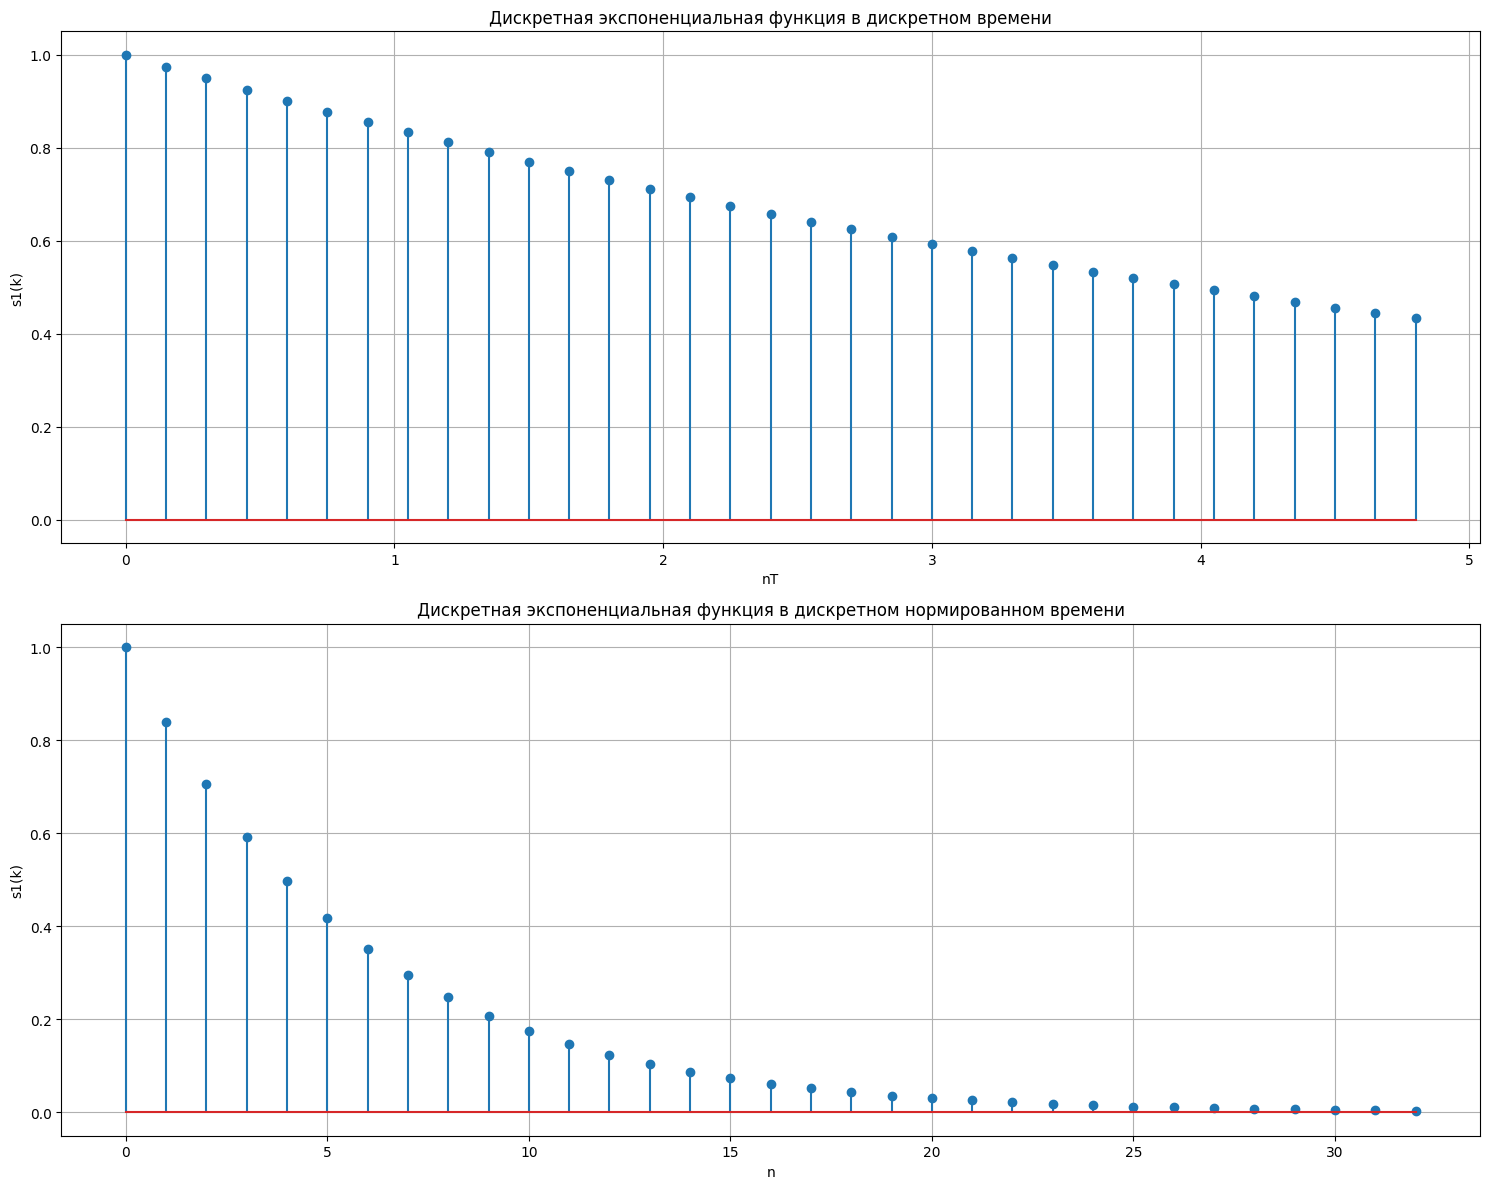

In [6]:
nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_s1(a, interval, m=0):
    s1 = np.zeros(len(interval))
    s1[m:] = np.power(a, interval[m:] - m)
    return s1

nT_s1 = get_s1(a, nT_interval)
n_s1 = get_s1(a, n_interval)

sub_plt1 = sub_plt(
    title='Дискретная экспоненциальная функция в дискретном времени',
    x=nT_interval,
    y=nT_s1,
    x_label='nT',
    y_label='s1(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Дискретная экспоненциальная функция в дискретном нормированном времени',
    x=n_interval,
    y=n_s1,
    x_label='n',
    y_label='s1(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (15, 12))


### Задание 4.
Смоделировать дискретный комплексный гармонический сигнал $s_{2}(k)= C \exp(j \hat{w_0} k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

Комплексный гармонический сигнал можно записать в следующем виде: $ s_{2}(k) = C \cdot ( \cos(\hat{w_0}k) + j \sin(\hat{w_0}k) ) $. В данном случае первая последовательность - $ C \cdot \cos(\hat{w_0}k) $, вторая - $ C \cdot \sin(\hat{w_0}k) $

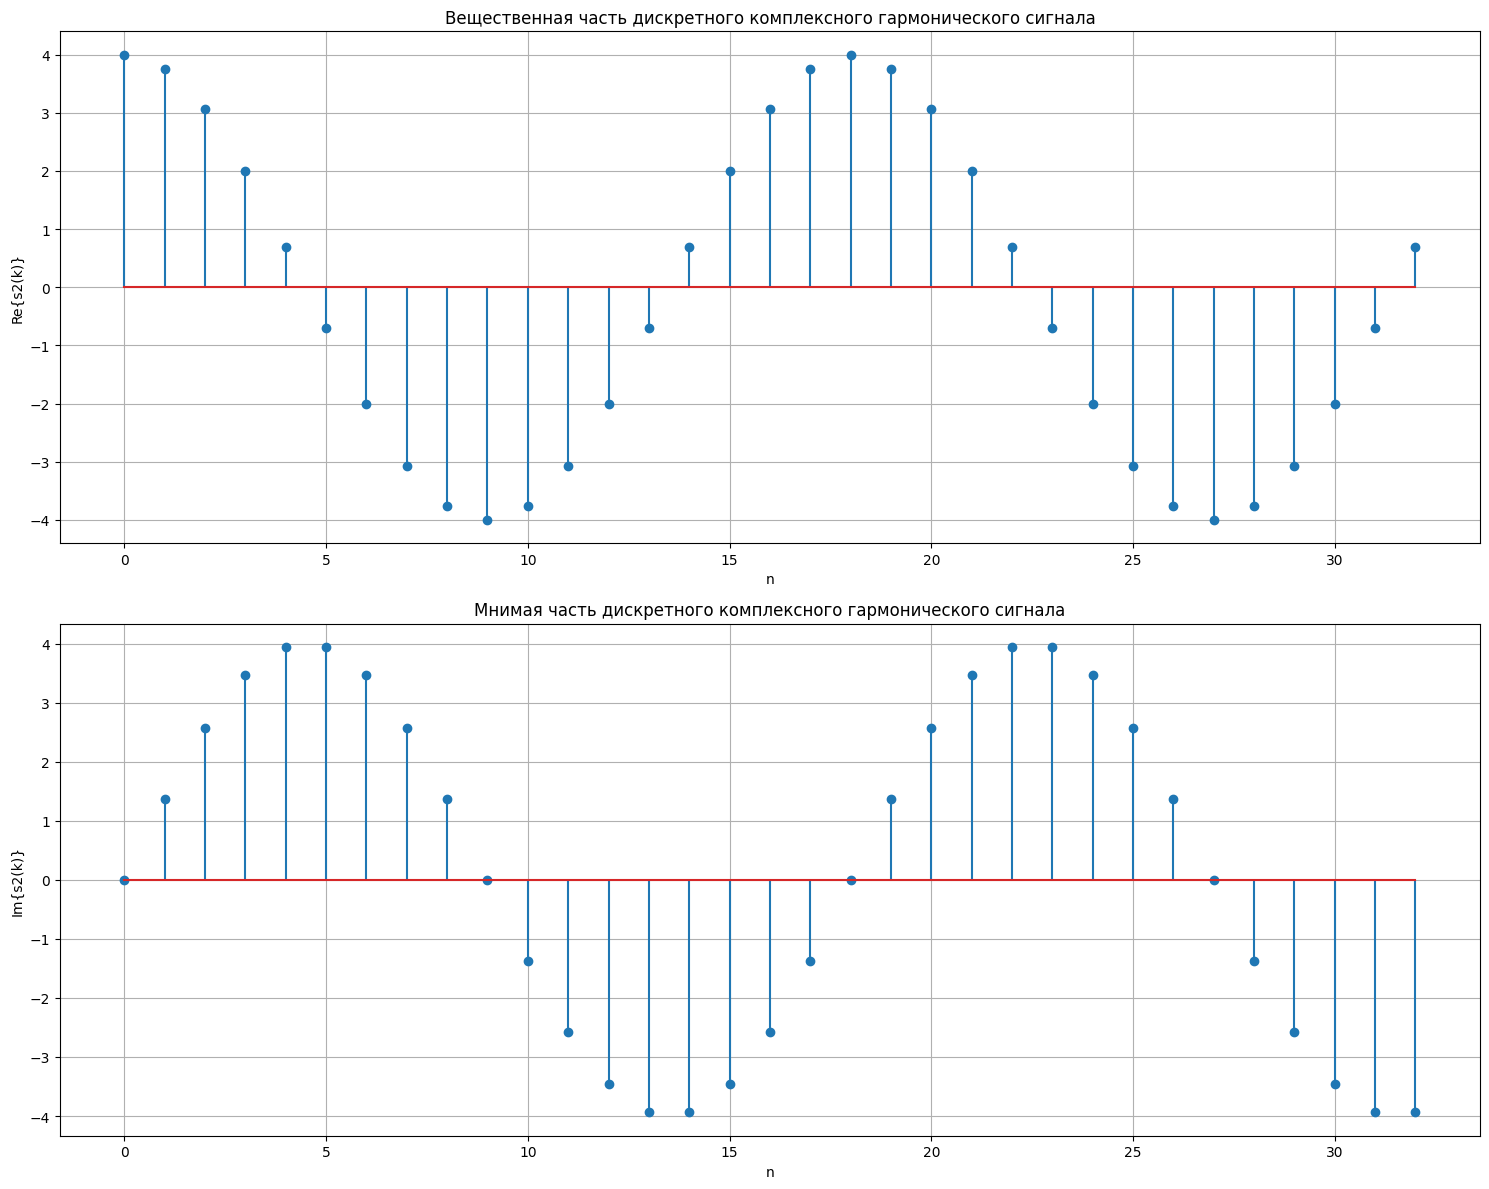

In [7]:
n_interval = np.arange(0, N)

def get_s2(C, omega, interval):
    s2 = np.zeros(len(interval))
    s2 = C * np.exp(1j * omega * interval)
    return s2

s2 = get_s2(C, omega, n_interval)
s2_real = np.real(s2)
s2_imag = np.imag(s2)

sub_plt1 = sub_plt(
    title='Вещественная часть дискретного комплексного гармонического сигнала',
    x=n_interval,
    y=s2_real,
    x_label='n',
    y_label='Re{s2(k)}',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Мнимая часть дискретного комплексного гармонического сигнала',
    x=n_interval,
    y=s2_imag,
    x_label='n',
    y_label='Im{s2(k)}',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (15, 12))

### Задание 5.
Вывести графики последовательностей $\delta_{d}(k)$, $\sigma_{d}(k)$ и $s_{1}(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.

1) Дискретный единичный цифровой импульс с задержкой:
$$ \delta_{d}(k) = \begin{cases} 1, k = m \\ 0, k \ne m \end{cases} $$

2) Дискретный единичный скачок с задержкой:
$$ \sigma_{d}(k) = \begin{cases} 1, k \ge m \\ 0, k < m \end{cases} $$

3) Дискретная экспоненциальная функция с задержкой:
$$ s_{1}(k) = \begin{cases} a^{k-m}, k \ge m \\ 0, k < m \end{cases} $$

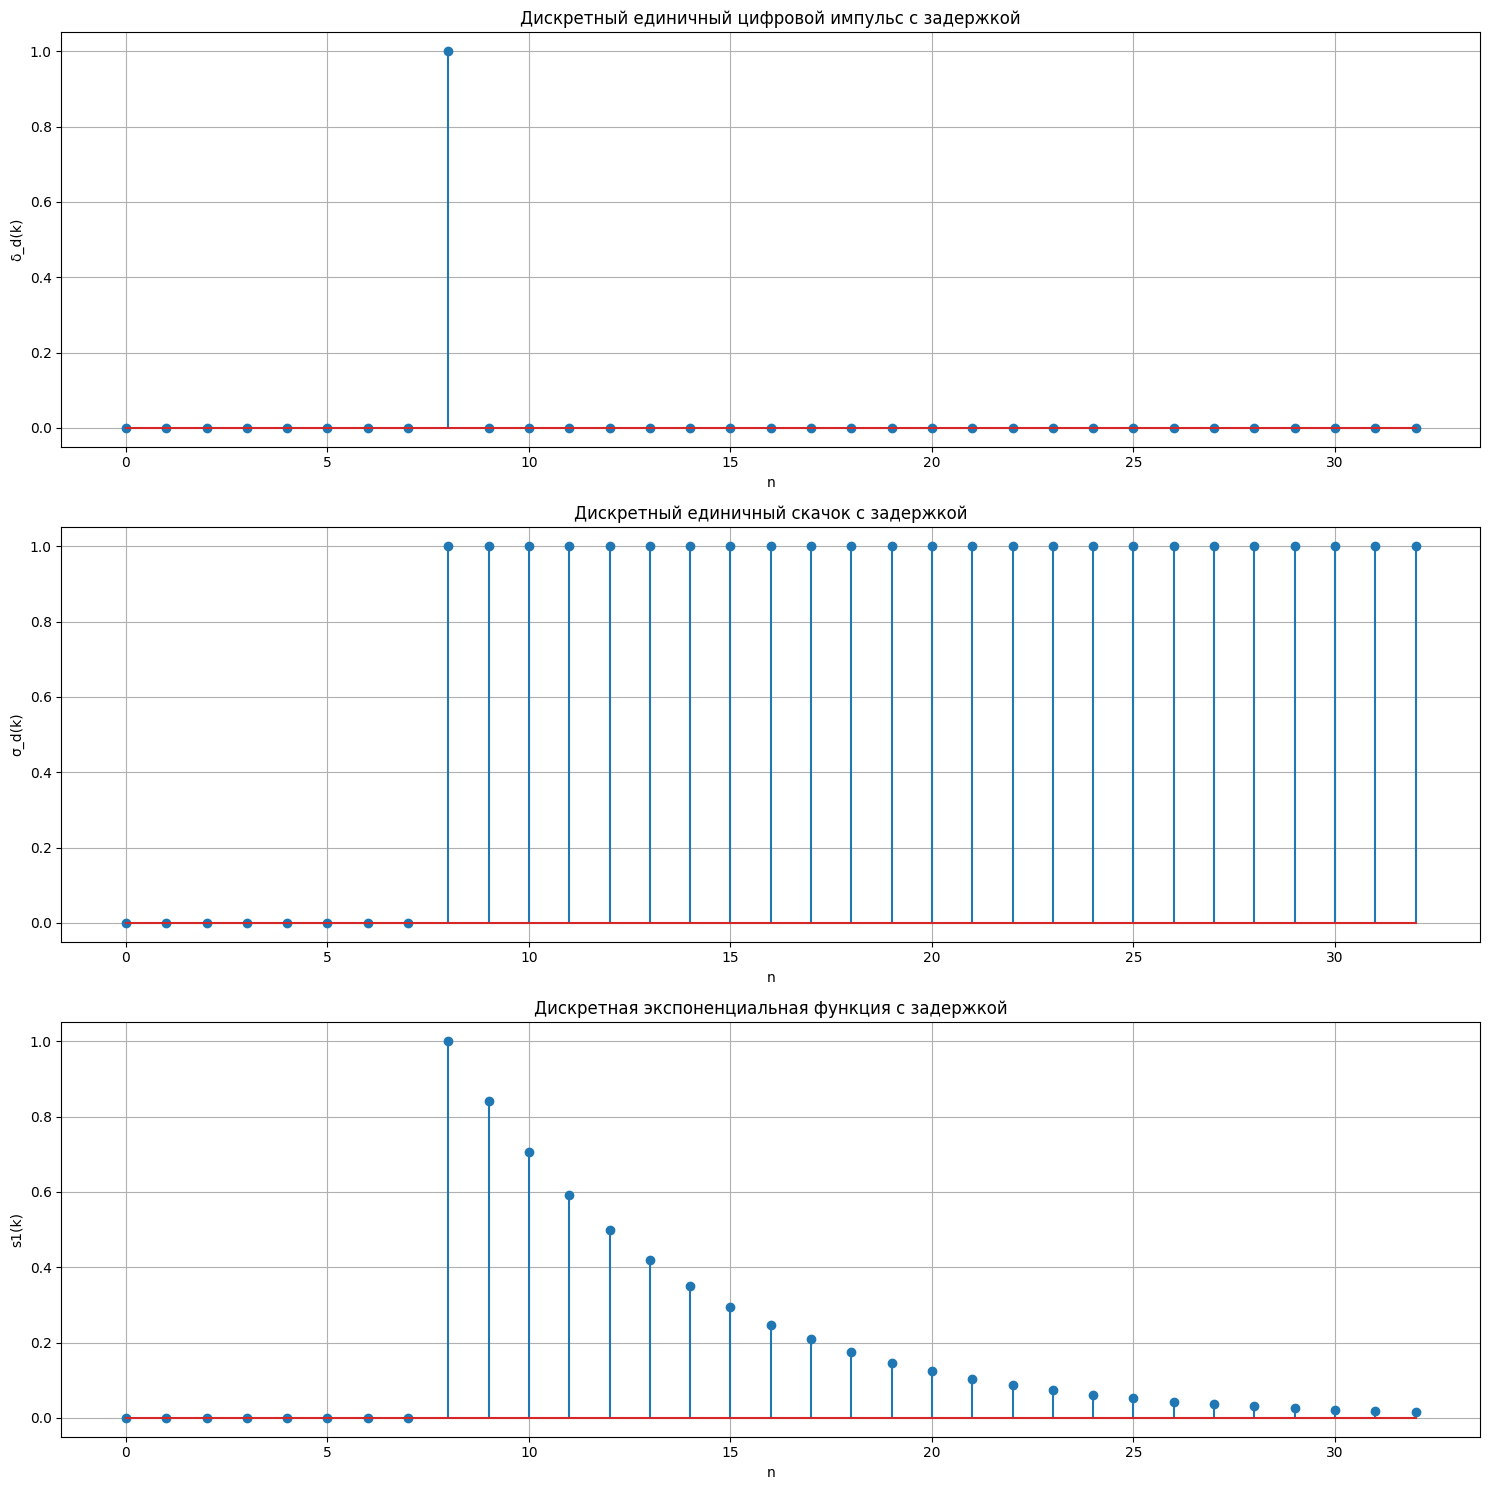

In [8]:
n_interval = np.arange(0, N)

delta_delayed = get_delta_d(n_interval, m=m)
sigma_delayed = get_sigma_d(n_interval, m=m)
s1_delayed = get_s1(a=a, interval=n_interval, m=m)

sub_plt1 = sub_plt(
    title='Дискретный единичный цифровой импульс с задержкой',
    x=n_interval,
    y=delta_delayed,
    x_label='n',
    y_label='δ_d(k)',
    pos=[3, 1, 1])

sub_plt2 = sub_plt(
    title='Дискретный единичный скачок с задержкой',
    x=n_interval,
    y=sigma_delayed,
    x_label='n',
    y_label='σ_d(k)',
    pos=[3, 1, 2])

sub_plt3 = sub_plt(
    title='Дискретная экспоненциальная функция с задержкой',
    x=n_interval,
    y=s1_delayed,
    x_label='n',
    y_label='s1(k)',
    pos=[3, 1, 3])


graphic([sub_plt1, sub_plt2, sub_plt3], (15, 15))

## Выводы
В ходе выполнения лабораторной работы изучены математические описания стандартных дискретных сигналов. Получены практические навыки моделирования сигналов с помощью программных средств. Рассмотренные сигналы: единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция, дискретный комплексный гармонический сигнал.
Полученные результаты подкреплены соответствующими графиками и выводами.